# **Part 2 - Exploratory Data Analysis**

## **Computational Drug Discovery Bioinformatics Project**

In this part, we will be performing descriptor calculations and exploratory data analysis.

---

## **Install Packages**

In [ ]:
! pip install rdkit

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

### **Import Libraries**

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

## **Load Bioactivity Data**

In [ ]:
df = pd.read_csv('aromatase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,13.0,active
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,13.0,active
2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,237.8,active
2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,1100.0,intermediate


## **Clean SMILES Molecular Fomulas**

In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name='canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL341591,7100.0,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.0,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.0,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.0,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.0,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2592,CHEMBL5285636,13.0,active,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1
2593,CHEMBL5266533,13.0,active,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1
2594,CHEMBL5278229,237.8,active,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1
2595,CHEMBL5275747,1100.0,intermediate,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1


## **Calculate Lipinski Descriptors**

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME), which is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is now referred to as **Lipinski's Rule** or the **Rule-of-Five**.

Lipinski's Rule states the following:
* Molecular weight (MW) < 500 Daltons
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Calculate Descriptors**

In [ ]:
def lipinski(smiles, verbose=False):

    moldata = []

    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    i = 0
    baseData = np.arange(1,1)

    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])

        if(i == 0): baseData = row

        else: baseData = np.vstack([baseData, row])

        i = i + 1

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2592,292.338,3.17100,0.0,4.0
2593,278.311,2.86800,1.0,4.0
2594,292.338,3.17100,0.0,4.0
2595,278.311,2.86800,1.0,4.0


### **Combine Datasets**

In [ ]:
df_combined = pd.concat([df, df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,13.0,active,292.338,3.17100,0.0,4.0
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,13.0,active,278.311,2.86800,1.0,4.0
2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,237.8,active,292.338,3.17100,0.0,4.0
2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,1100.0,intermediate,278.311,2.86800,1.0,4.0


### **Convert $IC_{50}$ to $pIC_{50}$**

To allow the $IC_{50}$ data to be more uniformly distributed, we will convert the standard values to the negative logarithmic scale, as otherwise expressed in the following:

$pIC_{50} = -log_{10}(IC_{50})$.

The function `pIC50` will accept a DataFrame as input and will:
* Take the $IC_{50}$ values from the ``standard_value`` column and convert it from $nM$ to $M$ via the multiplication of the value by $10^{-9}$
* Take the negative logarithm of the molar value
* Delete the `standard_value` column and create a new ``pIC50`` column

In [ ]:
def pIC50(input):

    pIC50 = []

    for i in input['standard_value_norm']:

        # Convert nM to M
        molar = i * (10 ** -9)
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [ ]:
df_combined.standard_value.describe()

count    2.597000e+03
mean     1.801579e+04
std      8.002271e+04
min      0.000000e+00
25%      1.600000e+02
50%      1.320000e+03
75%      8.900000e+03
max      2.398833e+06
Name: standard_value, dtype: float64

We will apply the custom `norm_value` function so that the values in the `standard_value` column are normalized.

To prevent the normalized values from becoming negative, standard values will be fixed at the upper bound of $10e+8$ and for preventing explosions towards infinity, values equal to zero will be removed altogether.

In [ ]:
def norm_value(input):

    # Remove all values equal to zero
    input = input[input.standard_value != 0]
    input = input.reset_index()

    bound = 10e+8
    norm = []

    for i in input['standard_value']:

        if i > bound: i = bound
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,index,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.0
1,1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.0
2,2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.0
3,3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.0
4,4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.0
...,...,...,...,...,...,...,...,...,...
2591,2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,292.338,3.17100,0.0,4.0,13.0
2592,2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,active,278.311,2.86800,1.0,4.0,13.0
2593,2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,active,292.338,3.17100,0.0,4.0,237.8
2594,2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,intermediate,278.311,2.86800,1.0,4.0,1100.0


In [ ]:
df_norm.standard_value_norm.describe()

count    2.596000e+03
mean     1.802273e+04
std      8.003735e+04
min      1.500000e-02
25%      1.600000e+02
50%      1.320000e+03
75%      8.900000e+03
max      2.398833e+06
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,index,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...,...
2591,2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,292.338,3.17100,0.0,4.0,7.886057
2592,2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,active,278.311,2.86800,1.0,4.0,7.886057
2593,2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,active,292.338,3.17100,0.0,4.0,6.623788
2594,2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,intermediate,278.311,2.86800,1.0,4.0,5.958607


In [ ]:
df_final.pIC50.describe()

count    2596.000000
mean        6.005234
std         1.283431
min         2.620000
25%         5.050610
50%         5.879426
75%         6.795880
max        10.823909
Name: pIC50, dtype: float64

### **Comparison of Distributions**

As can be seen below, the original $IC_{50}$ data is quite skewed towards lower values in the range but after normalization, the $pIC_{50}$ data is far more uniformly distributed along the negative logarithmic scale which allows for greater analysis and more meaningful insights to be drawn.

Text(0.5, 1.0, 'Normalized pIC50 Distribution')

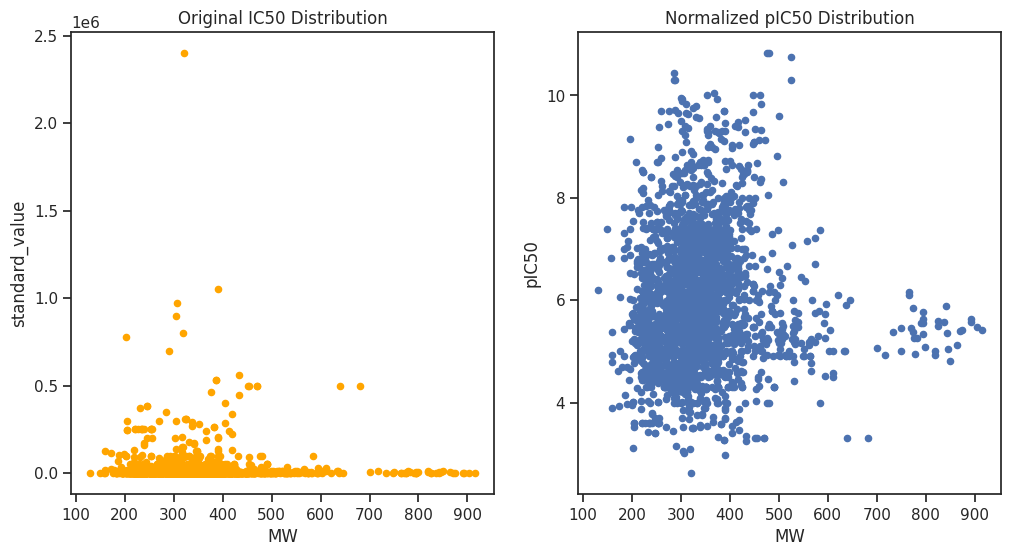

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

df_combined.plot.scatter(x='MW', y='standard_value', c='orange', ax = axes[0], subplots=True)
axes[0].set_title('Original IC50 Distribution')

df_final.plot.scatter(x='MW', y='pIC50', ax = axes[1], subplots=True)
axes[1].set_title('Normalized pIC50 Distribution')

Let's write this to a CSV file.

In [ ]:
df_final.to_csv('aromatase_04_bioactivity_data_3class_pIC50.csv')

### **Removing Redundant Data Entries**

For exploratory data analysis, we will be removing molecules and compounds belonging to the `intermediate` bioactivity class from our dataset to prevent redundancy when comparing statistical test results. This way we can have more meaningful interpretions and gain further insights.

Note that this is only for the analysis portion. The final model will still account for all three classes so that it can learn the patterns effectively.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class = df_2class.reset_index()
df_2class

,level_0,index,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,1,1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
1,2,2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
2,3,3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
3,4,4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
4,6,6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...,...,...
1834,2589,2590,CHEMBL5274084,CCCCCOc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,348.446,4.73140,0.0,4.0,7.376751
1835,2590,2591,CHEMBL5284760,CCCOc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,320.392,3.95120,0.0,4.0,8.698970
1836,2591,2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,292.338,3.17100,0.0,4.0,7.886057
1837,2592,2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,active,278.311,2.86800,1.0,4.0,7.886057


Let's write this to a CSV file as well.

In [ ]:
df_2class.to_csv('aromatase_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis**

We will conduct EDA with Chemical Space Analysis via the Lipinski descriptors to gain insights on our data.

### **Frequency Plot**

We see below that there are approximately twice as many molecules classed as active than there are inactive.

Text(0, 0.5, 'Frequency')

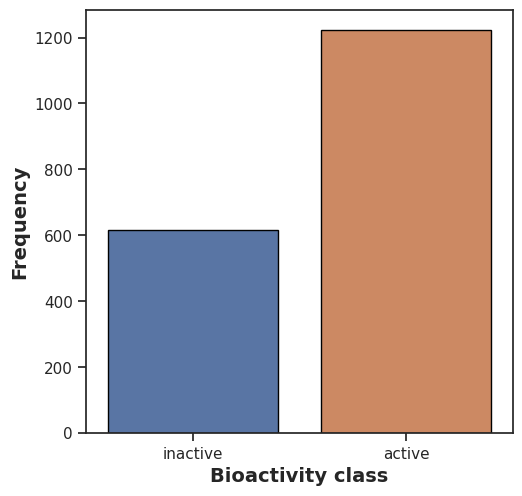

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black', hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

### **Scatter Plot**

It can be seen that the two bioactivity classes are spanning similar chemical spaces, evident by the scatter plot of **MW** against **LogP**.

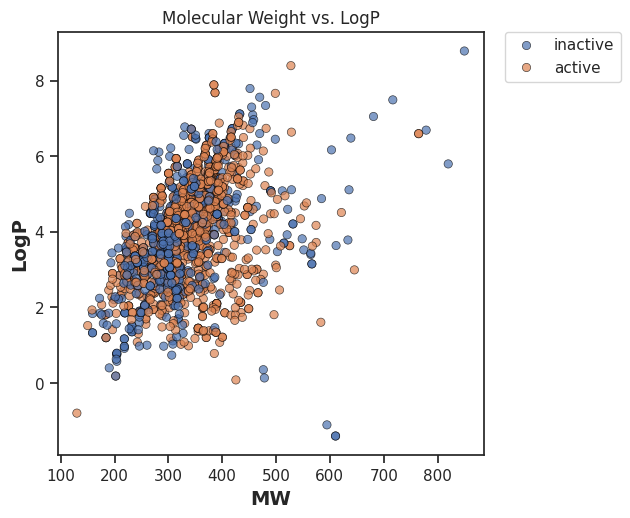

In [ ]:
plt.figure(figsize=(5.5, 5.5))
np.seterr(divide='ignore', invalid='ignore')
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', edgecolor='black', alpha=0.7).set_title('Molecular Weight vs. LogP')

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### **Box and Whisker Plot**

We will use the custom function `create_boxplot` to conveniently create box and whisker plots for Lipinski's descriptors.

In [ ]:
def create_boxplot(descriptor):

  plt.figure(figsize=(5.5, 5.5))

  sns.boxplot(x = 'class', y = descriptor, data = df_2class, hue='class').set_title('Box and Whisker Plot for ' + descriptor)

  plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
  plt.ylabel(descriptor, fontsize=14, fontweight='bold')

### **Mann-Whitney U Test**

The Mann-Whitney U Test is a statistical hypothesis test used to compare two independent data groups to check for a statistical difference. We will use the custom function `mannwhitney` to compare between the active and inactive bioactivity classes for each of the Lipinski descriptors.

In [ ]:
def mannwhitney(descriptor, verbose=False):

  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  # seed the random number generator
  seed(1)

  # actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

  # compare samples
  stat, p = mannwhitneyu(active, inactive)

  # interpret
  alpha = 0.05

  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'

  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistic':stat,
                          'p-value':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])

  return results

### **Individual Testing**

Let's create box and whisker plots and conduct the Mann-Whitney U test for the $pIC_{50}$ values along with each of the descriptors.

#### **$pIC_{50}$ Values**

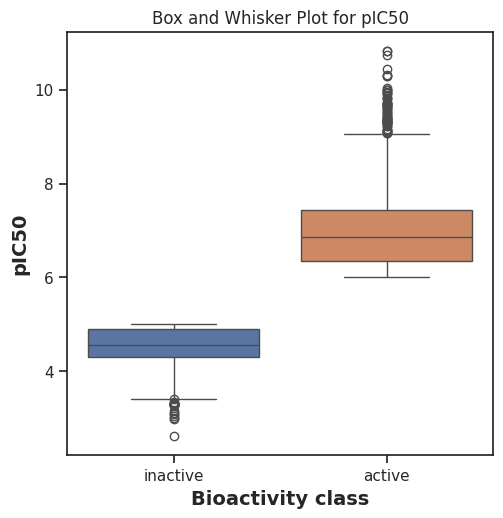

In [ ]:
create_boxplot('pIC50')

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistic,p-value,alpha,Interpretation
0,pIC50,753368.0,4.040304e-269,0.05,Different distribution (reject H0)


#### **MW**

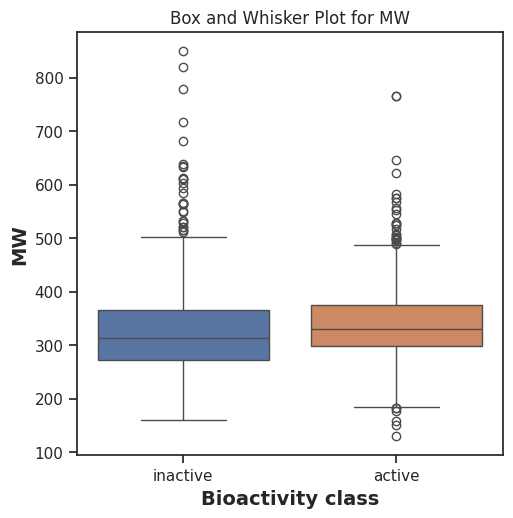

In [ ]:
create_boxplot('MW')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistic,p-value,alpha,Interpretation
0,MW,431584.0,3.256647e-07,0.05,Different distribution (reject H0)


#### **LogP**

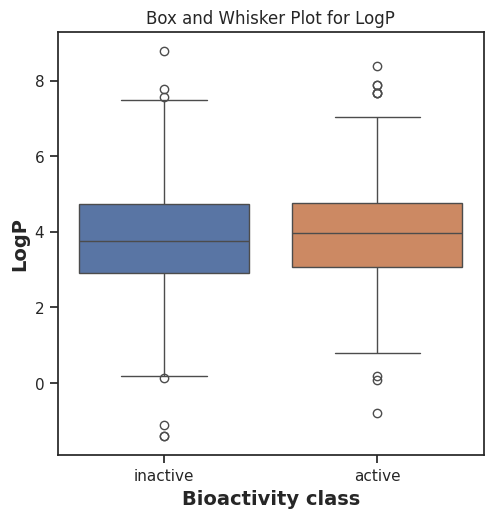

In [ ]:
create_boxplot('LogP')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistic,p-value,alpha,Interpretation
0,LogP,399519.0,0.033623,0.05,Different distribution (reject H0)


#### **NumHDonors**

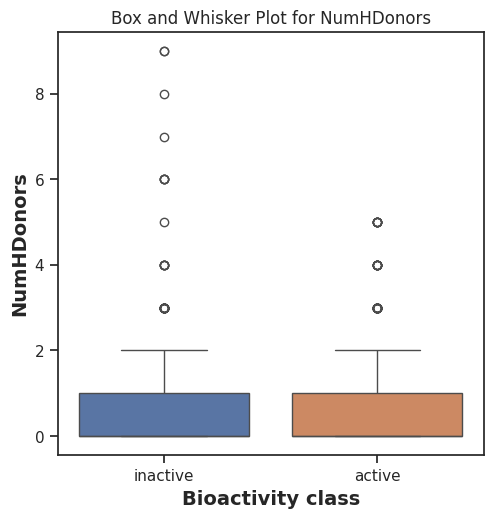

In [ ]:
create_boxplot('NumHDonors')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistic,p-value,alpha,Interpretation
0,NumHDonors,331297.5,0.000001,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

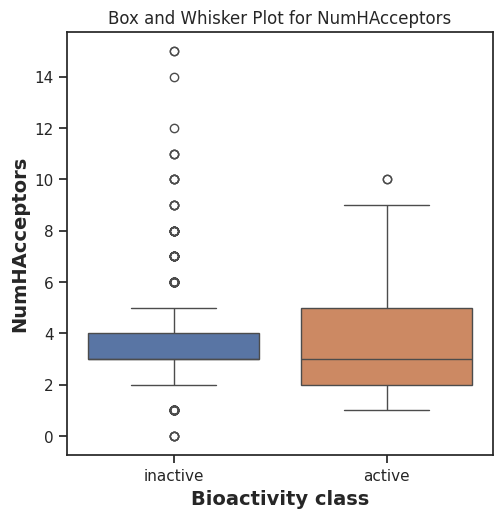

In [ ]:
create_boxplot('NumHAcceptors')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistic,p-value,alpha,Interpretation
0,NumHAcceptors,398855.0,0.035496,0.05,Different distribution (reject H0)


### **Interpretation of Statistical Results**

##### **$pIC_{50}$ values**

Taking a look at **pIC50** values, the **active** and **inactive** classes displayed a ***statistically significant difference***, which is to be expected since the following threshold values were used to define the bioactivity classes:

*   Active:
  * $IC_{50}$ $< 1,000$ $nM$
  * $pIC_{50}$ $> 6$
*   Inactive:
  * $IC_{50}$ $> 10,000$ $nM$
  * $pIC_{50}$ $< 5$

##### **Lipinski's descriptors**

All four of Lipinski's descriptors exhibited ***statistically significant difference*** between the **active** and **inactive** classes.